In [103]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [104]:
from docs.data_translation_tables.srazka_category import srazka_category

In [105]:
from docs.data_translation_tables.pricina_category import pricina_category

In [106]:
#hlavni_pricina

In [107]:
from docs.data_translation_tables.alkohol_category import alkohol_category

In [108]:
#alkohol_vinik

In [109]:
from docs.data_translation_tables.zavineni_category import zavineni_category

In [110]:
#nasledky

In [111]:
from docs.data_translation_tables.stav_vozovky_category import stav_vozovky_category

In [112]:
from docs.data_translation_tables.povetrnostni_podm_category import povetrnostni_podm_category

In [113]:
from docs.data_translation_tables.viditelnost_category import viditelnost_category

In [114]:
from docs.data_translation_tables.rozhled_category import rozhled_category

In [115]:
from docs.data_translation_tables.misto_nehody_category import misto_nehody_category

In [116]:
from docs.data_translation_tables.druh_komun_category import druh_komun_category

In [117]:
#situace_nehody

In [118]:
#druh_vozidla

In [119]:
#stav_ridic

In [120]:
#stav_chodce

In [121]:
#chovani_chodce

In [122]:
#ovlivneni_ridice

In [123]:
#osoba

In [124]:
#ozn_osoba

In [125]:
#pohlavi

In [126]:
#chodec_pohlavi

In [127]:
#nasledek

In [128]:
#nasledky_chodce

In [129]:
#prvni_pomoc

In [130]:
#usmrceno_os

In [131]:
#tezce_zran_os

In [132]:
#lehce_zran_os

In [133]:
#hmotna_skoda

In [134]:
#cas

In [135]:
#mesic

In [136]:
#rok

In [137]:
#den_v_tydnu

In [138]:
#doba

In [139]:
#vek_skupina

In [140]:
#nazev

In [141]:
path_prefix = "sources/"

In [142]:
columns_renaming = {
    'Y': 'point_y',
    'X': 'point_x',
    'POINT_Y': 'point_y',
    'POINT_X': 'point_x',
    'srazka': 'collision_with',
    'pricina': 'cause',
    'hlavni_pricina': 'main_cause',
    'alkohol': 'alcohol',
    'alkohol_vinik': 'alcohol_offender',
    'zavineni': 'caused_by',
    'nasledky': 'consequences',
    'stav_vozovky': 'road_condition',
    'povetrnostni_podm': 'weather',
    'viditelnost': 'visibility',
    'rozhled': 'view_condition',
    'misto_nehody': 'accident_place',
    'druh_komun': 'road_type',
    'situace_nehody': 'accident_circumstances',
    'druh_vozidla': 'vehicle_type',
    'stav_ridic': 'driver_condition',    
    'stav_chodce': 'pedestrian_condition',    
    'chovani_chodce': 'pedestrian_behaviour',
    'ovliveni_ridice': 'driver_circumstances',
    'osoba': 'person',
    'ozn_osoba': 'person_circumstances',
    'pohlavi': 'sex',
    'chodec_pohlavi': 'pedestrian_sex',      
    'nasledek': 'consequence',
    'nasledky_chodce': 'pedestrain_consequences',
    'prvni_pomoc': 'first_aid',
    'usmrceno_os': 'no_casualties',
    'tezce_zran_os': 'no_injured_major',
    'lehce_zran_os': 'no_injured_minor',    
    'hmotna_skoda': 'material_damage_price',    
    'cas': 'time',
    'hodina': 'hour', # redundant
    'mesic_t': 'month_text', #redundant
    'mesic': 'month',
    'rok': 'year',
    'den': 'day', #redundant
    'den_v_tydnu': 'weekday',
    'doba': 'day_night',    
    'vek_skupina': 'age_group',  
    'nazev': 'location',   
    
    'smrt': 'death', #zvytocne
    'smrt_dny': 'days_to_death', #zbytocne
   
}

In [143]:
sources = {}
sources["bike_accidents"] = pd.read_csv("sources/raw/bike_accidents.csv")
sources["ped_accidents"] = pd.read_csv("sources/raw/pedestrian_accidents.csv")
sources["pub_trans_stops"] = pd.read_csv("sources/raw/public_transport_stops.csv")
sources["street_lights"] = pd.read_csv("sources/raw/street_lights.csv")
sources["traffic_accidents"] = pd.read_csv("sources/raw/traffic_accidents.csv", low_memory=False)

In [144]:
srazka1 = sources['bike_accidents']['srazka'].unique()
srazka2 = sources['traffic_accidents']['srazka'].unique()
srazka3 = sources['ped_accidents']['srazka'].unique()

srazka4 = np.concatenate((srazka1, srazka2, srazka3), axis=0)
np.unique(srazka4)

array(['havárie', 'jiný druh nehody', 'srážka s chodcem',
       'srážka s domácím zvířetem',
       'srážka s jedoucím nekolejovým vozidlem', 'srážka s lesní zvěří',
       'srážka s pevnou překážkou', 'srážka s tramvají',
       'srážka s vlakem', 'srážka s vozidlem zaparkovaným, odstaveným'],
      dtype=object)

In [145]:
pricina1 = sources['bike_accidents']['pricina'].unique()
pricina2 = sources['traffic_accidents']['pricina'].unique()
pricina3 = sources['ped_accidents']['pricina'].unique()

pricina4 = np.concatenate((pricina1, pricina2, pricina3), axis=0)
np.unique(pricina4)

array(['bezohledná, agresivní, neohleduplná jízda',
       'chodci na vyznačeném přechodu', 'chyby při udání směru jízdy',
       'defekt pneumatiky způsobený průrazem nebo náhlým únikem vzduchu',
       'jiná technická závada (vztahuje se i na přípojná vozidla)',
       'jiné nedání přednosti', 'jiný druh nepřiměřené rychlosti',
       'jiný druh nesprávného předjíždění',
       'jiný druh nesprávného způsobu jízdy',
       'jízda (vjetí) jednosměrnou ulicí, silnicí (v protisměru)',
       'jízda na "červenou" 3-barevného semaforu',
       'jízda po nesprávné straně vozovky, vjetí do protisměru',
       'nedodržení bezpečné vzdálenosti za vozidlem',
       'nehoda při provádění služebního zákroku (pronásledování pachatele atd.)',
       'nehoda v důsledku použití (policií) prostředků k násilnému zastavení vozidla (zastavovací pásy, zábrana, vozidlo atd.)',
       'nepřizpůsobení rychlosti bočnímu, nárazovému větru (i při míjení, předjíždění vozidel)',
       'nepřizpůsobení rychlosti 

In [146]:
# hlavni_pricina1 = sources['bike_accidents']['hlavni_pricina'].unique()
hlavni_pricina2 = sources['traffic_accidents']['hlavni_pricina'].unique()
hlavni_pricina3 = sources['ped_accidents']['hlavni_pricina'].unique()

hlavni_pricina4 = np.concatenate((hlavni_pricina2, hlavni_pricina3), axis=0)
np.unique(hlavni_pricina4)

array(['nedání přenosti v jízdě', 'nepřiměřená rychlost jízdy',
       'nesprávný způsob jízdy', 'nesprávé předjíždění',
       'nezaviněno řidičem', 'technická závada vozidla'], dtype=object)

In [147]:
alkohol1 = sources['bike_accidents']['alkohol'].unique()
alkohol2 = sources['traffic_accidents']['alkohol'].unique()
alkohol3 = sources['ped_accidents']['alkohol'].unique()

alkohol4 = np.concatenate((alkohol1, alkohol2, alkohol3), axis=0)
np.unique(alkohol4)

array(['Ano, obsah alkoholu v krvi 1,5‰ a více',
       'Ano, obsah alkoholu v krvi do 0,24 ‰',
       'Ano, obsah alkoholu v krvi od 0,24‰ do 0,5‰',
       'Ano, obsah alkoholu v krvi od 0,5‰ do 0,8‰',
       'Ano, obsah alkoholu v krvi od 0,8‰ do 1,0‰',
       'Ano, obsah alkoholu v krvi od 1,0‰ do 1,5‰', 'Ne', 'Nezjišťován',
       'Pod vlivem alkoholu a drog', 'Pod vlivem drog'], dtype=object)

In [148]:
#alkohol_vinik1
alkohol_vinik2 = sources['traffic_accidents']['alkohol_vinik'].unique()
alkohol_vinik3 = sources['ped_accidents']['alkohol_vinik'].unique()

alkohol_vinik4 = np.concatenate((alkohol_vinik2, alkohol_vinik3), axis=0)
np.unique(alkohol_vinik4)

array(['ano', 'ne', 'nezjišťováno'], dtype=object)

In [149]:
zavineni1 = sources['bike_accidents']['zavineni'].unique()
zavineni2 = sources['traffic_accidents']['zavineni'].unique()
zavineni3 = sources['ped_accidents']['zavineni'].unique()

zavineni4 = np.concatenate((zavineni1, zavineni2, zavineni3), axis=0)
np.unique(zavineni4)

array(['chginsodcem', 'chodcem', 'jiné zaviněn',
       'jiným účastníkem silničního provozu',
       'lesní zvěří, domácím zvířectvem', 'technickou závadou vozidla',
       'závadou komunikace', 'řidičem motorového vozidla',
       'řidičem nemotorového vozidla'], dtype=object)

In [150]:
sources['bike_accidents']['nasledky'].unique()

array(['nehoda s následky na životě nebo zdraví',
       'nehoda pouze s hmotnou škodou'], dtype=object)

In [151]:
stav_vozovky1 = sources['bike_accidents']['stav_vozovky'].unique()
stav_vozovky2 = sources['traffic_accidents']['stav_vozovky'].unique()
stav_vozovky3 = sources['ped_accidents']['stav_vozovky'].unique()

stav_vozovky4 = np.concatenate((stav_vozovky1, stav_vozovky2, stav_vozovky3), axis=0)
np.unique(stav_vozovky4)

array(['jiný stav povrchu vozovky v době nehod', 'na vozovce je bláto',
       'na vozovce je náledí, ujetý sníh - neposypané',
       'na vozovce je náledí, ujetý sníh - posypané',
       'na vozovce je rozlitý olej, nafta apod.',
       'náhlá změna stavu vozovky (námraza na mostu, místní náledí)',
       'povrch mokrý', 'povrch suchý, neznečistěný',
       'povrch suchý, znečistěný (písek, prach, listí, štěrk atd.)',
       'souvislá sněhová vrstva, rozbředlý sníh'], dtype=object)

In [152]:
povetrnostni_podm1 = sources['bike_accidents']['povetrnostni_podm'].unique()
povetrnostni_podm2 = sources['traffic_accidents']['povetrnostni_podm'].unique()
povetrnostni_podm3 = sources['ped_accidents']['povetrnostni_podm'].unique()

povetrnostni_podm4 = np.concatenate((povetrnostni_podm1, povetrnostni_podm2, povetrnostni_podm3), axis=0)
np.unique(povetrnostni_podm4)

array(['déšť', 'jiné ztížené', 'mlha',
       'na počátku deště, slabý déšť, mrholení apod.', 'neztížené',
       'nárazový vítr (boční, vichřice apod.)', 'sněžení',
       'tvoří se námraza, náledí'], dtype=object)

In [153]:
viditelnost1 = sources['bike_accidents']['viditelnost'].unique()
viditelnost2 = sources['traffic_accidents']['viditelnost'].unique()
viditelnost3 = sources['ped_accidents']['viditelnost'].unique()

viditelnost4 = np.concatenate((viditelnost1, viditelnost2, viditelnost3), axis=0)
np.unique(viditelnost4)

array(['v noci - bez veřejného osvětlení, viditelnost nezhoršená vlivem povětrnostních podmínek',
       'v noci - bez veřejného osvětlení, viditelnost zhoršená vlivem povětrnostních podmínek (mlha, déšť, sněžení apod.',
       'v noci - s veřejným osvětlením, viditelnost nezhoršená vlivem povětrnostních podmínek',
       'v noci - s veřejným osvětlením, zhoršená viditelnost vlivem povětrnostních podmínek (mlha, déšť, sněžení apod.)',
       've dne, viditelnost nezhoršená vlivem povětrnostních podmínek',
       've dne, zhoršená viditelnost (svítání, soumrak)',
       've dne, zhoršená viditelnost vlivem povětrnostních podmínek (mlha, sněžení, déšť apod.)'],
      dtype=object)

In [154]:
rozhled1 = sources['bike_accidents']['rozhled'].unique()
rozhled2 = sources['traffic_accidents']['rozhled'].unique()
rozhled3 = sources['ped_accidents']['rozhled'].unique()

rozhled4 = np.concatenate((rozhled1, rozhled2, rozhled3), axis=0)
np.unique(rozhled4)

array(['dobré', 'jiné špatn', 'výhled zakryt stojícím vozidlem',
       'špatné - vlivem okolní zástavby (budovy, plné zábradlí apod.)',
       'špatné - vlivem průběhu komunikace, nebo podélného profilu nebo trasování (nepřehledný vrchol stoupání, zářez komunikace apod.)',
       'špatné - vlivem vegetace - přechodně (tráva, obilí apod.)',
       'špatné - vlivem vegetace - trvale (stromy, keře apod.)'],
      dtype=object)

In [155]:
misto_nehody1 = sources['bike_accidents']['misto_nehody'].unique()
misto_nehody2 = sources['traffic_accidents']['misto_nehody'].unique()
misto_nehody3 = sources['ped_accidents']['misto_nehody'].unique()

misto_nehody4 = np.concatenate((misto_nehody1, misto_nehody2, misto_nehody3), axis=0)
np.unique(misto_nehody4)

array(['most, nadjezd, podjezd, tunel',
       'parkoviště přiléhající ke komunikaci', 'přechod pro chodce',
       'v blízkosti přechodu pro chodce (do vzdálenosti 20 m)',
       'výjezd z parkoviště, lesní cesty apod. (pol.36=7,8)',
       'zastávka autobusu, trolejbusu, tramvaje s\xa0nástup. ostrůvkem',
       'zastávka tramvaje, autobusu, trolejbusu bez nástup. ostrůvku',
       'čerpadlo pohonných hmot',
       'železniční přejezd nezabezpečený závorami ani světelným výstražným zařízením',
       'železniční přejezd zabezpečený', 'žádné nebo žádné z uvedených'],
      dtype=object)

In [156]:
druh_komun1 = sources['bike_accidents']['druh_komun'].unique()
druh_komun2 = sources['traffic_accidents']['druh_komun'].unique()
druh_komun3 = sources['ped_accidents']['druh_komun'].unique()

druh_komun4 = np.concatenate((druh_komun1, druh_komun2, druh_komun3), axis=0)
np.unique(druh_komun4)

array(['dálnice', 'komunikace místní',
       'komunikace sledovaná (ve vybraných městech)',
       'komunikace účelová - ostatní (parkoviště, odpočívky apod.',
       'komunikace účelová - polní a lesní cesty atd.',
       'silnice I. třídy', 'silnice II. třídy', 'silnice III. třídy',
       'uzel (křižovatka sledovaná ve vybraných městech)'], dtype=object)

In [157]:
sources['ped_accidents']['situace_nehody'].unique()

array(['přecházení mimo přechod (2O a více metrů od přechodu)',
       'jiná situace', 'chůze, stání na chodníku',
       'přecházení po vyznačeném přechodu', 'vstup chodce na signál STŮJ',
       'vstup chodce do vozovky v blízkosti přechodu (cca do 2O m)',
       'vstup chodce na signál VOLNO',
       'přecházení těsně před nebo za vozidlem stojícím v zastávce',
       'přecházení těsně před nebo za vozidlem parkujícím',
       'chůze po správné straně', 'chůze po nesprávné straně'],
      dtype=object)

In [158]:
druh_vozidla1 = sources['bike_accidents']['druh_vozidla'].unique()
druh_vozidla2 = sources['traffic_accidents']['druh_vozidla'].unique()
# druh_vozidla3 

druh_vozidla4 = np.concatenate((druh_vozidla1, druh_vozidla2), axis=0)
np.unique(druh_vozidla4)

array(['autobus', 'chodec',
       'jiné motorové vozidlo (zemědělské, lesní, stavební stroje atd.)',
       'jiné nemotorové vozidlo', 'jiný druh vozidl', 'jízdní kolo',
       'malý motocykl (do 50 ccm)', 'moped',
       'motocykl (včetně sidecarů, skútrů apod.)',
       'nezjištěno, řidič ujel',
       'nákladní automobil (včetně multikáry, autojeřábu, cisterny atd.)',
       'nákladní automobil s návěsem', 'nákladní automobil s přívěsem',
       'osobní automobil bez přívěsu', 'osobní automobil s přívěsem',
       'povoz, jízda na koni', 'traktor (i s přívěsem)', 'tramvaj',
       'trolejbus', 'vlak'], dtype=object)

In [159]:
stav_ridic1 = sources['bike_accidents']['stav_ridic'].fillna('unknown').unique()
stav_ridic2 = sources['traffic_accidents']['stav_ridic'].fillna('unknown').unique()
#stav_ridic3


stav_ridic4 = np.concatenate((stav_ridic1, stav_ridic2), axis=0)
np.unique(stav_ridic4)

array(['dobrý -žádné nepříznivé okolnosti nebyly zjiště', 'invalid',
       'jiný nepříznivý sta', 'nemoc, úraz apod.',
       'pod vlivem alkoholu obsah alkoholu v krvi 1 ‰ a víc',
       'pod vlivem alkoholu, obsah alkoholu v krvi do 0,99 ‰',
       'pod vlivem léků, narkoti', 'pokus o sebevraždu, sebevražd',
       'unaven, usnul, náhlá fyzická indispozic', 'unknown',
       'řidič při jízdě zemřel (infarkt apod.'], dtype=object)

In [160]:
sources['ped_accidents']['stav_chodce'].unique()

array(['nepozornost, roztržitost', 'nezjištěno',
       'dobrý - žádné nepříznivé okolnosti nebyly zjištěny',
       'jiný neuvedený stav',
       'pod vlivem alkoholu, obsah alkoholu v krvi do 0,99 ‰,',
       'pod vlivem léků, narkotik',
       'pod vlivem alkoholu, obsah alkoholu v krvi 1 ‰ a více',
       'fyzická indispozice (nemoc, nevolnost, snížená pohyblivost apod.)',
       'invalida', 'pokus o sebevraždu, sebevražda'], dtype=object)

In [161]:
sources['ped_accidents']['chovani_chodce'].unique()

array(['špatný odhad vzdálenosti a rychlosti vozidla',
       'žádné z uvedených',
       'náhlé vstoupení do vozovky z chodníku, krajnice',
       'náraz do vozidla z boku', 'správné, přiměřené',
       'zmatené, zbrklé, nerozhodné jednání',
       'náhlé vstoupení do vozovky z nástupního nebo dělícího ostrůvku',
       'náhlá změna směru chůze', 'hra dětí na vozovce'], dtype=object)

In [162]:
# 99 = unknown
ovlivneni_ridice1 = sources['bike_accidents']['ovlivneni_ridice'].fillna(99).unique()
ovlivneni_ridice2 = sources['traffic_accidents']['ovlivneni_ridice'].fillna(99).unique()
# ovlivneni_ridice3

ovlivneni_ridice4 = np.concatenate((ovlivneni_ridice1, ovlivneni_ridice2), axis=0)
np.unique(ovlivneni_ridice4)

array([ 0.,  1.,  2.,  3.,  4.,  5., 99.])

In [163]:
osoba1 = sources['bike_accidents']['osoba'].fillna('unknown').unique()
osoba2 = sources['traffic_accidents']['osoba'].fillna('unknown').unique()
# osoba3

osoba4 = np.concatenate((osoba1, osoba2), axis=0)
np.unique(osoba4)

array(['chodec',
       'ostatní spolucestující (i v postranním vozíku motocyklu)',
       'spolucestující na předním sedadle vedle řidiče nebo spolujezdec (cestující) na motocyklu, jízdním kole',
       'spolucestující na zadním sedadle', 'unknown', 'řidič'],
      dtype=object)

In [164]:
ozn_osoba1 = sources['bike_accidents']['ozn_osoba'].fillna('unknown').unique()
ozn_osoba2 = sources['traffic_accidents']['ozn_osoba'].fillna('unknown').unique()
# ozn_osoba3

ozn_osoba4 = np.concatenate((ozn_osoba1, ozn_osoba2), axis=0)
np.unique(ozn_osoba4)

array(['bez přilby (pouze u motocyklistů, příp. cyklistů)',
       'bezpečnostní vak (airbag) v činnosti - osoba nepřipoutaná',
       'bezpečnostní vak (airbag) v činnosti - osoba připoutaná',
       'nepřipoutaný bezpečnostními pásy',
       'připoutaný bezpečnostními pásy (i na zadních sedadlech)',
       's přilbou (pouze u motocyklistů, příp. cyklistů)',
       'sedící v dětské sedačce', 'unknown',
       'vozidlo nevybaveno dětskou sedačkou'], dtype=object)

In [165]:
pohlavi1 = sources['bike_accidents']['pohlavi'].fillna('unknown').unique()
pohlavi2 = sources['traffic_accidents']['pohlavi'].fillna('unknown').unique()
# pohlavi3

pohlavi4 = np.concatenate((pohlavi1, pohlavi2), axis=0)
np.unique(pohlavi4)

array(['chlapec (do 15 let)', 'dívka (do 15 let)', 'muž', 'unknown',
       'žena'], dtype=object)

In [166]:
sources['ped_accidents']['chodec_pohlavi'].fillna('unknown').unique()

array(['muž', 'chlapec (do 15 let)', 'žena', 'dívka (do 15 let)',
       'unknown'], dtype=object)

In [167]:
nasledek1 = sources['bike_accidents']['nasledek'].fillna('unknown').unique()
nasledek2 = sources['traffic_accidents']['nasledek'].fillna('unknown').unique()
# nasledek3

nasledek4 = np.concatenate((nasledek1, nasledek2), axis=0)
np.unique(nasledek4)

array(['bez zraněn', 'bez zranění', 'lehké zranění', 'těžké zranění',
       'unknown', 'usmrcení'], dtype=object)

In [168]:
sources['ped_accidents']['nasledky_chodce'].fillna('unknown').unique()

array(['bez zranění', 'lehké zranění', 'usmrcení', 'těžké zranění',
       'unknown'], dtype=object)

In [169]:
sources['ped_accidents']['prvni_pomoc'].fillna('unknown').unique()

array(['nebylo třeba poskytnout', 'vozidlem RZP',
       'poskytnuta osádkou vozidel zúčast.na nehodě',
       'leteckou záchrannou službou', 'unknown', 'jinou osobou'],
      dtype=object)

In [170]:
# do not need, only numbers
usmrceno_os1 = sources['bike_accidents']['usmrceno_os'].unique()
usmrceno_os2 = sources['traffic_accidents']['usmrceno_os'].unique()
usmrceno_os3 = sources['ped_accidents']['usmrceno_os'].unique()

usmrceno_os4 = np.concatenate((usmrceno_os1, usmrceno_os2, usmrceno_os3), axis=0)
np.unique(usmrceno_os4)

array([0, 1, 2, 3])

In [171]:
# do not need, only numbers, do not need
tezce_zran_os1 = sources['bike_accidents']['tezce_zran_os'].unique()
tezce_zran_os2 = sources['traffic_accidents']['tezce_zran_os'].unique()
tezce_zran_os3 = sources['ped_accidents']['tezce_zran_os'].unique()

tezce_zran_os4 = np.concatenate((tezce_zran_os1, tezce_zran_os2, tezce_zran_os3), axis=0)
np.unique(tezce_zran_os4)

array([ 0,  1,  2,  3,  4, 14])

In [172]:
# do not need, only numbers, do not need
lehce_zran_os1 = sources['bike_accidents']['lehce_zran_os'].unique()
lehce_zran_os2 = sources['traffic_accidents']['lehce_zran_os'].unique()
lehce_zran_os3 = sources['ped_accidents']['lehce_zran_os'].unique()

lehce_zran_os4 = np.concatenate((lehce_zran_os1, lehce_zran_os2, lehce_zran_os3), axis=0)
np.unique(lehce_zran_os4)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 19, 29])

In [173]:
# do not need, only numbers, do not need
hmotna_skoda1 = sources['bike_accidents']['hmotna_skoda'].unique()
hmotna_skoda2 = sources['traffic_accidents']['hmotna_skoda'].unique()
hmotna_skoda3 = sources['ped_accidents']['hmotna_skoda'].unique()

hmotna_skoda4 = np.concatenate((hmotna_skoda1, hmotna_skoda2, hmotna_skoda3), axis=0)
np.unique(hmotna_skoda4)

array([      0,       1,       2,       5,       6,      10,      15,
            20,      25,      30,      31,      35,      40,      50,
            51,      55,      60,      70,      80,      90,      95,
           100,     105,     110,     115,     120,     125,     130,
           140,     150,     160,     170,     180,     190,     200,
           205,     210,     215,     220,     230,     240,     250,
           260,     265,     280,     300,     305,     310,     320,
           330,     340,     350,     351,     360,     370,     380,
           390,     400,     405,     410,     420,     430,     440,
           450,     480,     500,     510,     513,     520,     530,
           550,     560,     570,     600,     610,     620,     650,
           700,     750,     800,     810,     870,     900,     910,
           930,    1000,    1010,    1020,    1050,    1100,    1200,
          1210,    1500,    1700,    1900,    2000,    2350,    2500,
          3000,    3

In [174]:
rok1 = sources['bike_accidents']['rok'].unique()
rok2 = sources['traffic_accidents']['rok'].unique()
rok3 = sources['ped_accidents']['rok'].unique()

rok4 = np.concatenate((rok1, rok2, rok3), axis=0)
np.unique(rok4)



array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [175]:
# add padding and convert to time format
sources['bike_accidents']['minute'] = sources['bike_accidents']['cas'].astype(str).str.zfill(4).map(lambda x: x[2:])
# sources['bike_accidents']['cas'] = pd.to_datetime(sources['bike_accidents']['cas'], format='%H%M', errors='raise')

sources['traffic_accidents']['minute'] = sources['traffic_accidents']['cas'].astype(str).str.zfill(4).map(lambda x: x[2:])
# sources['traffic_accidents']['cas'] = pd.to_datetime(sources['traffic_accidents']['cas'], format='%H%M', errors='ignore')

sources['ped_accidents']['minute'] = sources['ped_accidents']['cas'].astype(str).str.zfill(4).map(lambda x: x[2:])
# sources['ped_accidents']['cas'] = pd.to_datetime(sources['ped_accidents']['cas'], format='%H%M', errors='ignore')


# build whole datetime and save it to datetime column

sources['bike_accidents']['datetime'] = pd.to_datetime(
    sources['bike_accidents'].rename(columns=columns_renaming)[
        [
            'year', 
            'month', 
            'day',
            'hour',
            'minute'
        ]
    ],
    format="%Y%m%d%H%M",
    errors='raise'
).astype('str')

sources['traffic_accidents']['datetime'] = pd.to_datetime(
    sources['traffic_accidents'].rename(columns=columns_renaming)[
        [
            'year', 
            'month', 
            'day',
            'hour',
            'minute'
        ]
    ],
    format="%Y%m%d%H%M",
    errors='raise'
).astype('str')

sources['ped_accidents']['datetime'] = pd.to_datetime(
    sources['ped_accidents'].rename(columns=columns_renaming)[
        [
            'year', 
            'month', 
            'day',
            'hour',
            'minute'
        ]
    ],
    format="%Y%m%d%H%M",
    errors='raise'
).astype('str')
# otherwise nothing needed

In [176]:
misto_nehody1 = sources['bike_accidents']['misto_nehody'].unique()
misto_nehody2 = sources['traffic_accidents']['misto_nehody'].unique()
misto_nehody3 = sources['ped_accidents']['misto_nehody'].unique()

misto_nehody4 = np.concatenate((misto_nehody1, misto_nehody2, misto_nehody3), axis=0)
np.unique(misto_nehody4)

array(['most, nadjezd, podjezd, tunel',
       'parkoviště přiléhající ke komunikaci', 'přechod pro chodce',
       'v blízkosti přechodu pro chodce (do vzdálenosti 20 m)',
       'výjezd z parkoviště, lesní cesty apod. (pol.36=7,8)',
       'zastávka autobusu, trolejbusu, tramvaje s\xa0nástup. ostrůvkem',
       'zastávka tramvaje, autobusu, trolejbusu bez nástup. ostrůvku',
       'čerpadlo pohonných hmot',
       'železniční přejezd nezabezpečený závorami ani světelným výstražným zařízením',
       'železniční přejezd zabezpečený', 'žádné nebo žádné z uvedených'],
      dtype=object)

In [177]:
# do I need the table for months?

In [178]:
# do I need the table for weekdays?
sources['bike_accidents']['den_v_tydnu'].fillna("unknown").astype(str).unique()

array(['neděle', 'čtvrtek', 'středa', 'úterý', 'pondělí', 'pátek',
       'sobota'], dtype=object)

In [179]:
vek_skupina1 = sources['bike_accidents']['vek_skupina'].fillna('unknown').unique()
# vek_skupina2
vek_skupina3 = sources['ped_accidents']['vek_skupina'].fillna('unknown').unique()

vek_skupina4 = np.concatenate((vek_skupina1, vek_skupina3), axis=0)
np.unique(vek_skupina4)

array(['0-6', '12-15', '16-18', '19-24', '24-32', '33-44', '45-60',
       '61-70', '7-11', '71 a více', 'unknown'], dtype=object)

In [180]:
vek_skupina1 = sources['bike_accidents']['vek_skupina'].fillna('unknown').unique()
# vek_skupina2
vek_skupina3 = sources['ped_accidents']['vek_skupina'].fillna('unknown').unique()

vek_skupina4 = np.concatenate((vek_skupina1, vek_skupina3), axis=0)
np.unique(vek_skupina4)

array(['0-6', '12-15', '16-18', '19-24', '24-32', '33-44', '45-60',
       '61-70', '7-11', '71 a více', 'unknown'], dtype=object)

In [181]:
sources['bike_accidents']['den_v_tydnu'].fillna("unknown").astype(str).unique()


array(['neděle', 'čtvrtek', 'středa', 'úterý', 'pondělí', 'pátek',
       'sobota'], dtype=object)

In [182]:

sources['bike_accidents']['nazev'].fillna("unknown").astype(str).unique()


array(['Brno-Bosonohy', 'Brno-sever', 'Brno-Ivanovice',
       'Brno-Královo Pole', 'Brno-střed', 'Brno-Komín', 'Brno-jih',
       'Brno-Nový Lískovec', 'Brno-Žabovřesky', 'Brno-Kníničky',
       'Brno-Líšeň', 'Brno-Maloměřice a Obřany', 'Brno-Slatina',
       'Brno-Tuřany', 'Brno-Bystrc', 'Brno-Židenice', 'Brno-Kohoutovice',
       'Brno-Bohunice', 'Brno-Černovice', 'Brno-Medlánky',
       'Brno-Řečkovice a Mokrá Hora', 'Brno-Vinohrady',
       'Brno-Starý Lískovec', 'Brno-Chrlice', 'Brno-Jehnice',
       'Brno-Jundrov', 'Brno-Útěchov', 'Brno-Ořešín', 'Brno-Žebětín',
       'unknown'], dtype=object)

In [183]:
# doba (den/noc)
sources['bike_accidents']['doba'] = sources['bike_accidents']['cas'].apply(lambda x: 'night' if '2200' < x < '2400' or '0000' < x < '0600' else 'day')
sources['ped_accidents']['doba'] = sources['ped_accidents']['cas'].apply(lambda x: 'night' if '2200' < x < '2400' or '0000' < x < '0600' else 'day')
sources['traffic_accidents']['doba'] = sources['traffic_accidents']['cas'].apply(lambda x: 'night' if '2200' < x < '2400' or '0000' < x < '0600' else 'day')


TypeError: '<' not supported between instances of 'str' and 'int'

In [184]:
pohlavi1 = sources['bike_accidents']['pohlavi'].fillna("unknown").astype(str).unique()
pohlavi2 = sources['traffic_accidents']['pohlavi'].fillna("unknown").astype(str).unique()
pohlavi3 = sources['ped_accidents']['chodec_pohlavi'].fillna("unknown").astype(str).unique()

pohlavi4 = np.concatenate((pohlavi1, pohlavi2, pohlavi3), axis=0)
np.unique(pohlavi4)

array(['chlapec (do 15 let)', 'dívka (do 15 let)', 'muž', 'unknown',
       'žena'], dtype=object)

In [193]:
# data merging - merge all casulties to one accident
common_columns = ["POINT_X", "POINT_Y", "datetime"]
sources['ped_accidents'].dropna(subset=['POINT_X', 'POINT_Y'], inplace=True)
sources['ped_accidents']['no_parties'] = sources['ped_accidents'].groupby(by=common_columns)["X"].transform('size')
                         
sources['ped_accidents']['no_parties'].unique()


array([1, 2, 3, 4])

In [194]:
# sources['bike_accidents'].dropna(subset=['POINT_X', 'POINT_Y'], inplace=True)
common_columns = ["point_x", "point_y", "datetime"]
sources['bike_accidents']['no_parties'] = sources['bike_accidents'].groupby(by=common_columns)["X"].transform('size')

sources['bike_accidents']['no_parties'].unique()


array([ 1,  2, 14,  3])

In [233]:
common_columns = ["POINT_X", "POINT_Y", "datetime"]
sources['traffic_accidents'].dropna(subset=['POINT_X', 'POINT_Y'], inplace=True)


sources['traffic_accidents']['no_parties'] = sources['traffic_accidents'].groupby(by=common_columns)["X"].transform('size')

sources['traffic_accidents'].groupby(by=common_columns)["pohlavi"].transform(list)

#     sources['traffic_accidents']['sex_participants']


0                        muž
1                        muž
2                        muž
3                        muž
4                        muž
                ...         
66054    chlapec (do 15 let)
66055    chlapec (do 15 let)
66056                    muž
66057                   žena
66058                    muž
Name: pohlavi, Length: 65733, dtype: object

In [ ]:
# merge grouped data to list

In [187]:
columns = ["POINT_Y", "POINT_X", "datetime", "zavineni", "viditelnost", "cas", "hodina", "mesic_t", "doba", "den_v_tydnu", "alkohol", "alkohol_vinik", "hlavni_pricina", "srazka", "pricina", "stav_vozovky", "povetrnostni_podm", "rozhled", "misto_nehody", "druh_komun", "usmrceno_os", "tezce_zran_os", "lehce_zran_os", "hmotna_skoda", "smrt", "smrt_dny", "vek_skupina", "chodec_pohlavi", "stav_chodce", "chovani_chodce", "situace_nehody", "prvni_pomoc", "nasledky_chodce", "nazev"]
ped_accidents_dict = sources["ped_accidents"][columns].rename(
    columns=columns_renaming
).dropna(
    subset=["point_x", "point_y"]
).fillna(
    "unknown"
).replace(
    srazka_category
).replace(
    pricina_category
).replace(
    alkohol_category
).replace(
    zavineni_category
).replace(
    stav_vozovky_category
).replace(
    povetrnostni_podm_category
).replace(
    misto_nehody_category
).replace(
    viditelnost_category
).replace(
    rozhled_category
).replace(
    misto_nehody_category
).replace(
    druh_komun_category
).to_dict(orient="records")
with open(path_prefix + "ped_accidents.js", "w") as out:
    out.write("const pedestrian_accidents_json = " + str(ped_accidents_dict))

In [188]:
columns = ["POINT_Y", "POINT_X", "datetime", "zavineni", "viditelnost", "cas", "hodina", "mesic_t", "doba", "den_v_tydnu", "alkohol", "alkohol_vinik", "hlavni_pricina", "srazka", "pricina", "stav_vozovky", "povetrnostni_podm", "rozhled", "misto_nehody", "druh_komun", "usmrceno_os", "tezce_zran_os", "lehce_zran_os", "hmotna_skoda", "smrt", "smrt_dny", "druh_vozidla", "stav_ridic", "ovlivneni_ridice", "osoba", "ozn_osoba", "pohlavi", "nasledek"]
traffic_accidents_dict = sources["traffic_accidents"][columns].rename(
    columns=columns_renaming
).dropna(
    subset=["point_x", "point_y"]
).fillna(
    "unknown"
).replace(
    srazka_category
).replace(
    pricina_category
).replace(
    alkohol_category
).replace(
    zavineni_category
).replace(
    stav_vozovky_category
).replace(
    povetrnostni_podm_category
).replace(
    misto_nehody_category
).replace(
    viditelnost_category
).replace(
    rozhled_category
).replace(
    misto_nehody_category
).replace(
    druh_komun_category
).to_dict(orient="records")
with open(path_prefix + "traffic_accidents.js", "w") as out:
    out.write("const traffic_accidents_json = " + str(traffic_accidents_dict))

In [189]:
columns = ["point_y", "point_x", "datetime", "pricina", "alkohol", "zavineni", "nasledky", "stav_vozovky", "povetrnostni_podm", "viditelnost", "rozhled", "misto_nehody", "druh_komun", "druh_vozidla", "stav_ridic", "ovlivneni_ridice", "osoba", "ozn_osoba", "pohlavi", "nasledek", "usmrceno_os", "tezce_zran_os", "lehce_zran_os", "hmotna_skoda", "cas", "hodina", "den_v_tydnu", "vek_skupina", "nazev"]
bike_accidents_dict = sources["bike_accidents"][columns].rename(
    columns=columns_renaming
).dropna(subset=["point_x", "point_y"]
        ).fillna(
    "unknown"
).replace(
    srazka_category
).replace(
    pricina_category
).replace(
    alkohol_category
).replace(
    zavineni_category
).replace(
    stav_vozovky_category
).replace(
    povetrnostni_podm_category
).replace(
    misto_nehody_category
).replace(
    viditelnost_category
).replace(
    rozhled_category
).replace(
    misto_nehody_category
).replace(
    druh_komun_category
).to_dict(orient="records")
with open(path_prefix + "bike_accidents.js", "w") as out:
    out.write("const bike_accidents_json = " + str(bike_accidents_dict))

In [190]:
columns = ["Y", "X", "datum_instalace"]
sources["street_lights"][columns].to_json(path_prefix  + "street_lights.json", orient="records")

In [191]:
columns = ["Y", "X", "stop_name"]
sources["pub_trans_stops"][columns].to_json(path_prefix + "pub_trans_stops.json", orient="records")

In [62]:
# shapefiles processing
cycling_infrastructure = gpd.read_file('sources/cykloopatreni_realizovana_opendata_0.zip')
cycling_infrastructure['typ_opatre'].unique()

array(['Jízda cyklistů v protisměru (piktogram)',
       'Piktogramový koridor pro cyklisty - V20',
       'Vyhrazený jízdní pruh pro cyklisty - V14',
       'Vjezd cyklistům povolen', 'Jízda cyklistů v protisměru - E12',
       'Zákaz vjezdu všech motorových vozidel - B11',
       'Stezka pro chodce a cyklisty (nedělená) - C9', 'Úsek byl zrušen',
       'Stezka pro chodce s povoleným vjezdem cyklistů',
       'Přejezd pro cyklisty',
       'Jízda cyklistů v protisměru (jízdní pruh)',
       'Stezka pro chodce a cyklisty (dělená) - C10',
       'Ochranný jízdní pruh pro cyklisty', 'Stezka pro cyklisty - C8',
       'Vjezd cyklistům zakázán', 'Vyhrazený pruh pro taxi, cyklo, bus',
       'Ostatní'], dtype=object)

In [63]:
cycling_infrastructure_translation_table = {
        'Jízda cyklistů v protisměru (piktogram)': 'Cyclists riding in the opposite direction',
        'Piktogramový koridor pro cyklisty - V20': 'Marked corridor for cyclists',
        'Vyhrazený jízdní pruh pro cyklisty - V14': 'Dedicated bicycle lane',
        'Vjezd cyklistům povolen': 'Entry allowed for cyclists',
        'Jízda cyklistů v protisměru - E12': 'Cyclists riding in the opposite direction',
        'Zákaz vjezdu všech motorových vozidel - B11': 'No entry for all motor vehicles',
        'Stezka pro chodce a cyklisty (nedělená) - C9': 'Path for pedestrians and cyclists (unseparated)', 
        'Úsek byl zrušen': 'The section was canceled',
        'Stezka pro chodce s povoleným vjezdem cyklistů': 'Pedestrian path with cyclists allowed',
        'Přejezd pro cyklisty': 'Bicycle crossing',
        'Jízda cyklistů v protisměru (jízdní pruh)': 'Bike path in the opposite direction (lane)',
        'Stezka pro chodce a cyklisty (dělená) - C10': 'Path for pedestrians and cyclists (separated)',
        'Ochranný jízdní pruh pro cyklisty': 'Protective lane for cyclists', 
        'Stezka pro cyklisty - C8': 'Bike path',
        'Vjezd cyklistům zakázán': 'Prohibited entry for cyclists', 
        'Vyhrazený pruh pro taxi, cyklo, bus': 'Reserved lane for taxi, bicycle, bus',
        'Ostatní': 'others'
}

In [66]:
cycling_infra_dfs = {}
cycling_infrastructure.replace(cycling_infrastructure_translation_table, inplace=True)
for value in cycling_infrastructure_translation_table.values():
    cycling_infra_dfs[value] = cycling_infrastructure.loc[cycling_infrastructure['typ_opatre'] == value]

cycling_infra_dfs['others'].head()

,ObjectId,ogcfid,typ_opatre,rok_realiz,delka,datum_expo,GlobalID,SHAPE_Leng,geometry
435,436,66,others,2007.0,36.669998,2022-11-04,{15EC0643-8994-4D89-8184-55EE2983E0C4},0.000496,"LINESTRING (16.57474 49.17755, 16.57511 49.177..."
489,490,87,others,2014.0,46.570000,2022-11-04,{B980886D-91B4-4E23-B6A9-AED0EA120A0B},0.000422,"LINESTRING (16.59511 49.18430, 16.59512 49.184..."
566,567,90,others,2014.0,31.910000,2022-11-04,{7030E6BF-F6B3-4CAF-A792-F3B2D6EF9D8B},0.000289,"LINESTRING (16.59514 49.18449, 16.59512 49.184..."


In [ ]:
cycl_shp_prefix = "sources/shapefiles/cycling_measures"    
for key, value in cycling_infra_dfs.items():
    value.to_file(f"{cycl_shp_prefix}/{key.title().replace(' ', '').replace(',', '_')}.shp.zip", driver='ESRI Shapefile')

In [45]:
street_slopes = gpd.read_file("sources/Street_slopes.zip")

<AxesSubplot: >

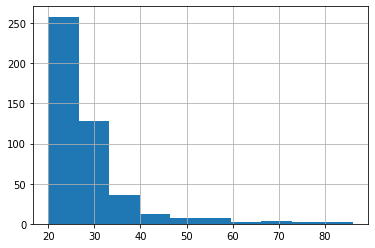

In [59]:
# Fix incorrect data -> 141% slope in one place actually has only 4% slope (confirmed with mapy.cz)
street_slopes['slope'].mask(street_slopes['slope'] == 141.61761475, 4 , inplace=True ) # beware the float representation

# split the data 0-5, 5-10, 10-20, 20+

slope_dfs = {}

slope_dfs['min'] = street_slopes.loc[street_slopes['slope'] <= 5]
slope_dfs['medium'] = street_slopes.loc[(street_slopes['slope'] > 5) & (street_slopes['slope'] <= 10)]
slope_dfs['dangerous'] = street_slopes.loc[(street_slopes['slope'] > 10) & (street_slopes['slope'] <= 20)]
slope_dfs['extreme'] = street_slopes.loc[street_slopes['slope'] > 20]




In [60]:
slopes_shp_prefix = "sources/shapefiles/street_slopes"    
for key, value in slope_dfs.items():
    value.to_file(f"{slopes_shp_prefix}/{key.title()}.shp.zip", driver='ESRI Shapefile')

/home/kbulkova/.local/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/kbulkova/.local/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/kbulkova/.local/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/kbulkova/.local/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
